In [1]:
#Loading required libraries
library(tidyverse)
library(lubridate)
library(ggplot2)
library(skimr)
library(pivottabler)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
#Load the datasets
Q1_2019 <- read_csv("/kaggle/input/cycliststripdata2019/CyclistsTripData2019/Divvy_Trips_2019_Q1.csv")
Q2_2019 <- read_csv("/kaggle/input/cycliststripdata2019/CyclistsTripData2019/Divvy_Trips_2019_Q2.csv")
Q3_2019 <- read_csv("/kaggle/input/cycliststripdata2019/CyclistsTripData2019/Divvy_Trips_2019_Q3.csv")
Q4_2019 <- read_csv("/kaggle/input/cycliststripdata2019/CyclistsTripData2019/Divvy_Trips_2019_Q4.csv")


Rows: 365069 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num  (1): tripduration
dttm (2): start_time, end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1108163 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): 03 - Rental Start Station Name, 02 - Rental End Station Name, User...
dbl  (5): 01 - Rental Details Rental ID, 01 - Rental Details Bike ID, 03 - R...
num  (1): 01 - Rental Details Duration In Seconds Uncapped
dttm (2): 01 - Rental Details Local Start Time, 01 - Rental Details Local En...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_

 # Process

In [3]:
#Understand column structure
colnames(Q1_2019)
colnames(Q2_2019)
colnames(Q3_2019)
colnames(Q4_2019)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

In [4]:
#Rename column names for consistency
Q2_2019 <- Q2_2019 %>%
  rename(
 "trip_id" = "01 - Rental Details Rental ID",              
 "start_time" = "01 - Rental Details Local Start Time",        
 "end_time" = "01 - Rental Details Local End Time",          
 "bikeid" = "01 - Rental Details Bike ID",                
 "tripduration" = "01 - Rental Details Duration In Seconds Uncapped",
 "from_station_id" = "03 - Rental Start Station ID",             
 "from_station_name" = "03 - Rental Start Station Name",                
 "to_station_id" = "02 - Rental End Station ID",                 
 "to_station_name" = "02 - Rental End Station Name",                
 "usertype" = "User Type",                                     
 "gender" = "Member Gender",                               
 "birthyear" = "05 - Member Details Member Birthday Year")


In [5]:
#Bind the 4 dataframes together into a single dataframe
TripData2019 <- bind_rows(Q1_2019,Q2_2019,Q3_2019,Q4_2019)

In [6]:
#Review the new dataframe for consistency of data
colnames(TripData2019)   #List of column names
nrow(TripData2019)       #No of rows  in data frame
dim(TripData2019)        #Dimensions of the data frame
head(TripData2019)       #First 6 rows of data frame
tail(TripData2019)       #Last 6 rows of data frame
str(TripData2019)        #List of columns and data types (numeric, character, etc)
summary(TripData2019)    #Statistical summary of data, mainly for numerics

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] 3818004

[1] 3818004      12

trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983


trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
25962899,2019-12-31 23:54:54,2020-01-01 00:22:02,5996,1628,145,Mies van der Rohe Way & Chestnut St,25,Michigan Ave & Pearson St,Subscriber,Male,1992
25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,1172,112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981
25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,1533,90,Millennium Park,90,Millennium Park,Subscriber,Male,1992
25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967
25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970
25962904,2019-12-31 23:57:17,2019-12-31 23:59:18,5930,120,256,Broadway & Sheridan Rd,240,Sheridan Rd & Irving Park Rd,Subscriber,Male,1982


spc_tbl_ [3,818,004 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ trip_id          : num [1:3818004] 21742443 21742444 21742445 21742446 21742447 ...
 $ start_time       : POSIXct[1:3818004], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ end_time         : POSIXct[1:3818004], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ bikeid           : num [1:3818004] 2167 4386 1524 252 1170 ...
 $ tripduration     : num [1:3818004] 390 441 829 1783 364 ...
 $ from_station_id  : num [1:3818004] 199 44 15 123 173 98 98 211 150 268 ...
 $ from_station_name: chr [1:3818004] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ to_station_id    : num [1:3818004] 84 624 644 176 35 49 49 142 148 141 ...
 $ to_station_name  : chr [1:3818004] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ usertype         : chr [1:3818004] "Subscriber" "Subscriber"

    trip_id           start_time                     end_time                  
 Min.   :21742443   Min.   :2019-01-01 00:04:37   Min.   :2019-01-01 00:11:07  
 1st Qu.:22873787   1st Qu.:2019-05-29 15:49:26   1st Qu.:2019-05-29 16:09:28  
 Median :23962320   Median :2019-07-25 17:50:54   Median :2019-07-25 18:12:23  
 Mean   :23915629   Mean   :2019-07-19 21:47:37   Mean   :2019-07-19 22:11:47  
 3rd Qu.:24963703   3rd Qu.:2019-09-15 06:48:05   3rd Qu.:2019-09-15 08:30:13  
 Max.   :25962904   Max.   :2019-12-31 23:57:17   Max.   :2020-01-21 13:54:35  
                                                                               
     bikeid      tripduration      from_station_id from_station_name 
 Min.   :   1   Min.   :      61   Min.   :  1.0   Length:3818004    
 1st Qu.:1727   1st Qu.:     411   1st Qu.: 77.0   Class :character  
 Median :3451   Median :     709   Median :174.0   Mode  :character  
 Mean   :3380   Mean   :    1450   Mean   :201.7                     
 3rd Qu.:5

# Cleaning and manipulation of data

In [7]:
n_distinct(TripData2019$trip_id)         # Total No. of rows

TripData2019 <- TripData2019 %>%
    distinct(trip_id, .keep_all = TRUE)  #Removed duplicate rows

TripData2019 <- drop_na(TripData2019)    #Removed Null values


[1] 3818004

In [8]:
#Checking if data makes sense
unique(TripData2019$gender)            #'Male''Female'
unique(TripData2019$usertype)          #'Subscriber''Customer'
sum(unique(TripData2019$to_station_id))
summary(TripData2019$birthyear)        #Check if birthyear makes sense
summary(TripData2019$tripduration) 


[1] "Male"   "Female"

[1] "Subscriber" "Customer"

[1] 204960

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1759    1979    1987    1984    1992    2014 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     61     380     631    1071    1076 9056633 

In [9]:
# Removing inaccurate data 
TripData2019 <- subset(TripData2019, birthyear >= 1940 & birthyear <= 2010) # Taking age between 9 and 60

In [10]:
#Add new columns as required for analysis
TripData2019 <- mutate(TripData2019, age = (2019 - birthyear)) #Calculate age and add new column 
TripData2019  <- TripData2019  %>%
                    select(-c(birthyear))                      #Remove unnecessary column

In [11]:
#Verifying tripduration values (integrity check)
TripData2019 <- mutate(TripData2019, ride_length = difftime(end_time , start_time, units="sec"))
TripData2019  <- TripData2019  %>%
                    select(-c(ride_length))                   #Remove unnecessary column

In [12]:
#Checking data for errors
library(skimr)
skim_without_charts(TripData2019$age)
skim_without_charts(TripData2019$tripduration)

,skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,numeric,data,0,1,34.89047,10.77002,16,27,32,40,79


── Data Summary ────────────────────────
                           Values          
Name                       TripData2019$age
Number of rows             3257603         
Number of columns          1               
_______________________                    
Column type frequency:                     
  numeric                  1               
________________________                   
Group variables            None            

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate mean   sd p0 p25 p50 p75 p100
1 data                  0             1 34.9 10.8 16  27  32  40   79


,skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,numeric,data,0,1,1070.075,20732.15,61,380,631,1076,9056633


── Data Summary ────────────────────────
                           Values                   
Name                       TripData2019$tripduration
Number of rows             3257603                  
Number of columns          1                        
_______________________                             
Column type frequency:                              
  numeric                  1                        
________________________                            
Group variables            None                     

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean     sd p0 p25 p50  p75    p100
1 data                  0             1 1070. 20732. 61 380 631 1076 9056633


In [13]:
#Add new columns for weekday and month as required for analysis
library(lubridate)
TripData2019$day_of_week <- weekdays(TripData2019$start_time)
TripData2019$month <- month(TripData2019$start_time)
TripData2019$month <- month.abb[TripData2019$month]       #Convertig numbers to month names

# Analysis

In [14]:
sapply(TripData2019,class) #review structure

$trip_id
[1] "numeric"

$start_time
[1] "POSIXct" "POSIXt" 

$end_time
[1] "POSIXct" "POSIXt" 

$bikeid
[1] "numeric"

$tripduration
[1] "numeric"

$from_station_id
[1] "numeric"

$from_station_name
[1] "character"

$to_station_id
[1] "numeric"

$to_station_name
[1] "character"

$usertype
[1] "character"

$gender
[1] "character"

$age
[1] "numeric"

$day_of_week
[1] "character"

$month
[1] "character"

In [15]:
#summaraize data for usertype
library(pivottabler)
pt <- PivotTable$new()
pt$addData(TripData2019)
pt$addColumnDataGroups("usertype")
pt$addRowDataGroups("gender")
pt$defineCalculation(calculationName="Count", summariseExpression="n()")
pt$defineCalculation(calculationName="Mean Age", summariseExpression="mean(age)",format="%.1f")
pt$defineCalculation(calculationName="Mean Ride Duration", summariseExpression="mean(tripduration)",format="%.1f")
#pt$defineCalculation(calculationName="Min Age", summariseExpression="min(age)")
#pt$defineCalculation(calculationName="Max Age", summariseExpression="max(age)")
pt$evaluatePivot()
pt$renderPivot()

HTML widgets cannot be represented in plain text (need html)

In [16]:
#Analysing the most busy weekday
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
result <- getmode(TripData2019$day_of_week)
sprintf('Weekday with the most number of rides: %s' ,result)               # Mode of days_of_week

customerlist <- subset(TripData2019, usertype == "Customer")
result <- getmode(customerlist$day_of_week)
sprintf('Weekday with the most number of rides by Customers:%s',result)    # Mode of days_of_week from customer subset

subscriberlist <- subset(TripData2019, usertype == "Subscriber")
result <- getmode(subscriberlist$day_of_week)
sprintf('Weekday with the most number of rides by Subscribers:%s',result)   # Mode of days_of_week from subscriber subset


[1] "Weekday with the most number of rides: Tuesday"

[1] "Weekday with the most number of rides by Customers:Saturday"

[1] "Weekday with the most number of rides by Subscribers:Tuesday"

In [17]:
#Summarising rides count by weekday and usertype and arranged in descending by No of Rides
subscriberlist %>%
    group_by(day_of_week) %>%
        summarise(No_of_Rides = n(),
                 .groups = 'drop') %>%
                        arrange(-No_of_Rides) 
customerlist %>%
    group_by(day_of_week) %>%
        summarise(No_of_Rides = n(),
                 .groups = 'drop') %>%
                         arrange(-No_of_Rides) 

day_of_week,No_of_Rides
<chr>,<int>
Tuesday,493091
Wednesday,490476
Thursday,483096
Monday,455098
Friday,453263
Saturday,284538
Sunday,253902


day_of_week,No_of_Rides
<chr>,<int>
Saturday,78580
Sunday,63522
Friday,47110
Thursday,41112
Monday,40651
Wednesday,36768
Tuesday,36396


In [18]:
#Searching if their are any popular bike stations which are preferred by both the Customers and Subscribers
subset(TripData2019, usertype == "Subscriber") %>%
  group_by(to_station_name) %>% summarize (number = n())%>%
  arrange(-number) %>%
  head()
subset(TripData2019, usertype == "Customer") %>%
  group_by(to_station_name) %>% summarize (number = n())%>%
  arrange(-number) %>%
  head()

to_station_name,number
<chr>,<int>
Clinton St & Washington Blvd,47863
Canal St & Adams St,47262
Clinton St & Madison St,43961
Daley Center Plaza,30508
Kingsbury St & Kinzie St,29855
Michigan Ave & Washington St,27819


to_station_name,number
<chr>,<int>
Streeter Dr & Grand Ave,19664
Lake Shore Dr & North Blvd,8896
Lake Shore Dr & Monroe St,8452
Michigan Ave & Oak St,7938
Millennium Park,7500
Theater on the Lake,6869


#  Visualisations

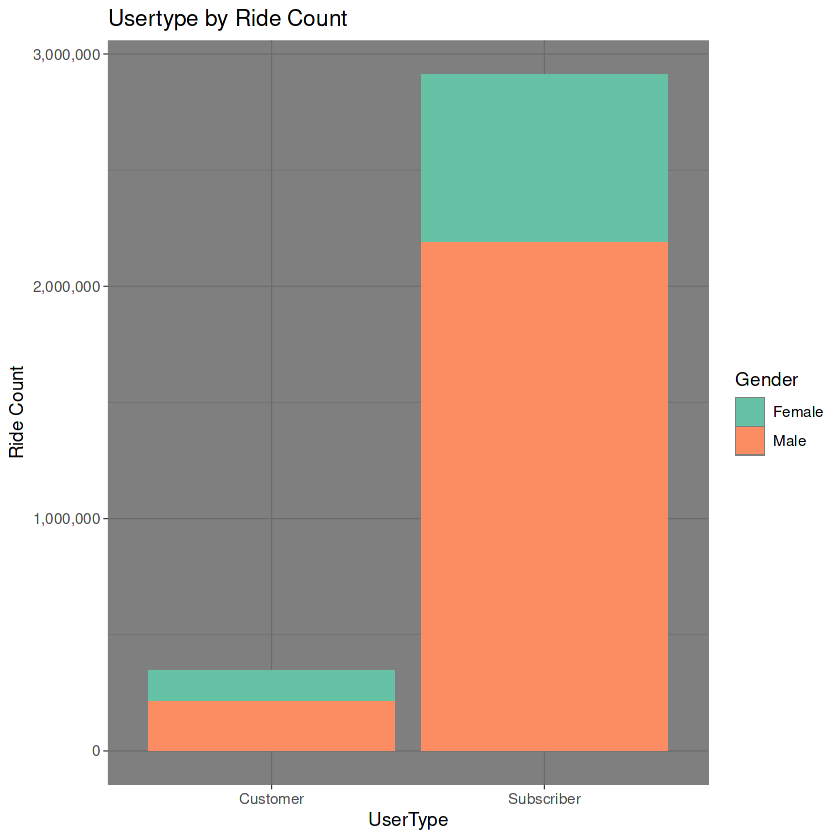

In [19]:
#Plot usertype by ride count and gender
ggplot(data = TripData2019) +
        (mapping=aes(x=usertype, fill = gender)) + geom_bar() +scale_y_continuous(labels = scales::comma) + theme_dark() +
         scale_fill_brewer(palette = "Set2",name = "Gender")  + labs(x = "UserType", y = "Ride Count", title = "Usertype by Ride Count") 
         

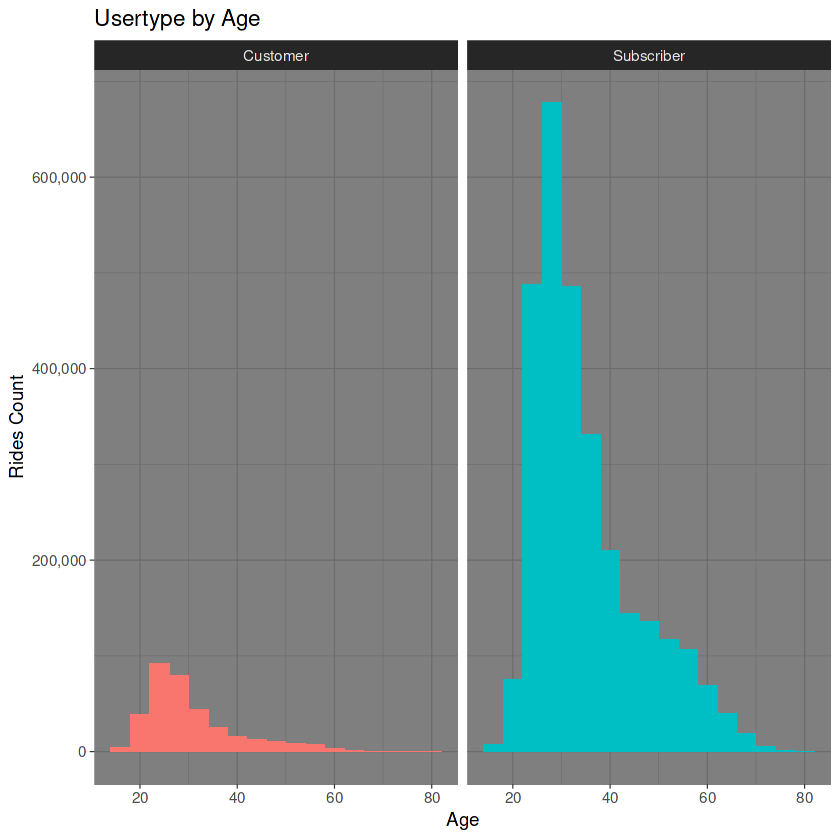

In [25]:
#Plot usertype by age
ggplot(data = TripData2019) +
        (mapping=aes(x=age, fill = usertype)) + geom_histogram(binwidth = 5) +
         facet_wrap(vars(usertype)) + labs(x = "Age", y = "Rides Count", title = "Usertype by Age") +
        theme_dark() + theme(legend.position = "None") +scale_y_continuous(labels = scales::comma)


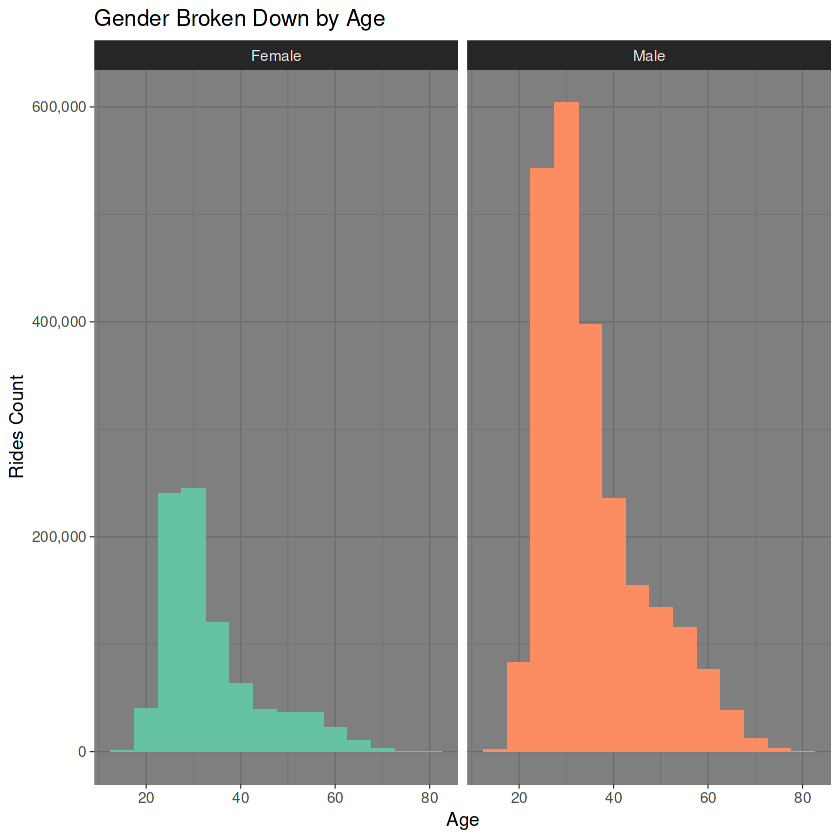

In [21]:
#Plot gender broken down by age
ggplot(data = TripData2019, aes(x = age, fill = gender)) + geom_histogram(binwidth = 5) +
      facet_wrap(vars(gender)) + labs(x = "Age", y = "Rides Count", title = "Gender Broken Down by Age") +
      scale_y_continuous(labels = scales::comma) + theme_dark() + theme(legend.position = "None") +
      scale_fill_brewer(palette = "Set2")

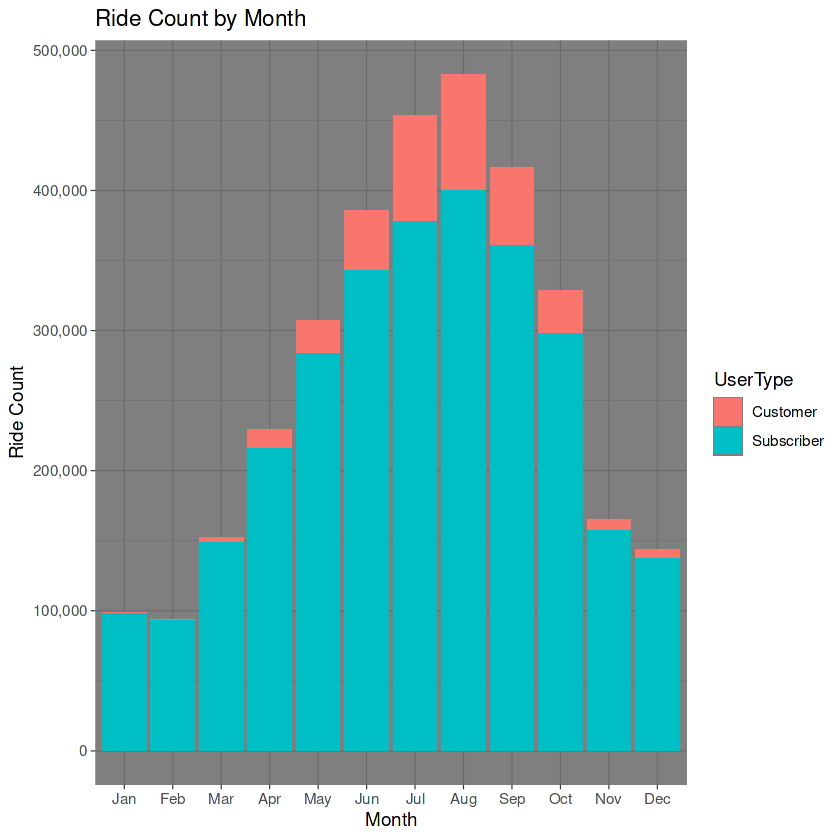

In [22]:
#Plot for ride count by month and usertype
TripData2019$month = factor(TripData2019$month, levels = month.abb)
ggplot(data = TripData2019) +
        (mapping=aes(x=month, fill = usertype)) + geom_bar() +scale_y_continuous(labels = scales::comma) + theme_dark() +
        labs(title = "Ride Count by Month", x = "Month" ,y = "Ride Count") + scale_fill_discrete(name ="UserType")


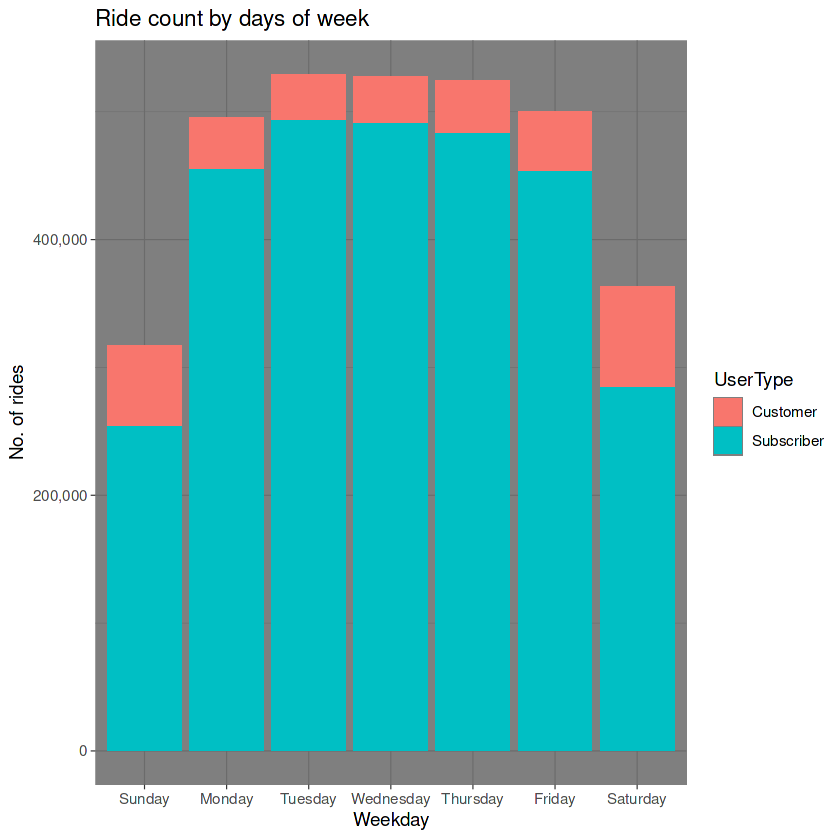

In [23]:
#Plot ride count by days of week
TripData2019$day_of_week <- factor(TripData2019$day_of_week, levels= c("Sunday", "Monday", 
    "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

temp <- TripData2019[order(TripData2019$day_of_week), ]

ggplot(data = temp) +
        (mapping=aes(x=day_of_week, fill = usertype)) + geom_bar() +scale_y_continuous(labels = scales::comma,) + theme_dark() +
        labs(title ='Ride count by days of week', x= 'Weekday', y ='No. of rides') + scale_fill_discrete(name ="UserType") 
        